In [1]:
from gamearg import *
from IPython.display import display, Image

## Facts Define

In [2]:
%%file files/test_animal.lp
move(a, h).
move(h, a).

move(b, k).
move(k, b).

move(b, l).

move(i, c).
move(c, i).

move(c, o).

move(d, j).

move(j, e).
move(k, e).

move(f, n).
move(n, f).

move(i,g).
move(m,g).

Overwriting files/test_animal.lp


**Note**: For the given example, if you change the `reverse` paramater to `True` you will get 4 possible worlds below; `False` results in 2 possible worlds.

In [3]:
# You only need edit this cell
input_file = "files/test_animal.lp"
keyword = "arg"  # arg or game depends on the graphvis_settings.json
reverse = True  # whether you want to reverse the edge direction

## Show Plain Graph

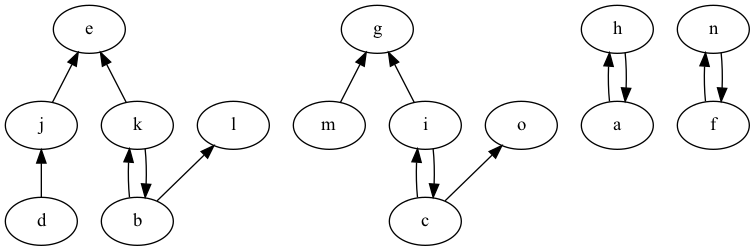

In [4]:
show_plain(input_file, keyword, reverse)

## Well-Founded Semantics

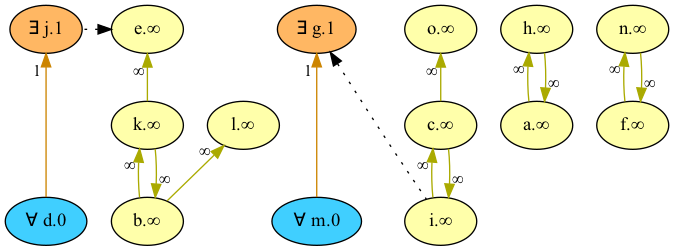

In [5]:
show_wfs(input_file, keyword, reverse)

## Stable Models

In [6]:
show_stb(input_file, keyword, reverse)

In [7]:
wfs_stb_pws, df_wfs_stb = node_stb_cal(input_file, keyword, reverse)

In [8]:
df_wfs_stb

,node,state_id,wfs,pw_1,pw_2,pw_3,pw_4,pw_5,pw_6,pw_7,pw_8,pw_9,pw_10,pw_11,pw_12,pw_13,pw_14,pw_15,pw_16
0,d,0,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted
1,m,0,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted
2,g,1,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated
3,j,1,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated
4,h,∞,undefined,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated
5,a,∞,undefined,defeated,defeated,defeated,defeated,defeated,defeated,defeated,defeated,accepted,accepted,accepted,accepted,accepted,accepted,accepted,accepted
6,k,∞,undefined,accepted,defeated,accepted,defeated,accepted,accepted,defeated,defeated,accepted,defeated,accepted,defeated,accepted,accepted,defeated,defeated
7,b,∞,undefined,defeated,accepted,defeated,accepted,defeated,defeated,accepted,accepted,defeated,accepted,defeated,accepted,defeated,defeated,accepted,accepted
8,l,∞,undefined,accepted,defeated,accepted,defeated,accepted,accepted,defeated,defeated,accepted,defeated,accepted,defeated,accepted,accepted,defeated,defeated
9,c,∞,undefined,accepted,accepted,defeated,defeated,accepted,defeated,accepted,defeated,accepted,accepted,accepted,accepted,defeated,defeated,defeated,defeated


In [9]:
if keyword == "game":
    status_1 = "lost"
    status_2 = "won"
else:
    status_1 = "accepted"
    status_2 = "defeated"
count_columns = [col for col in df_wfs_stb.columns if col.startswith("pw_")]
df_wfs_stb[f"{status_1}_count"] = df_wfs_stb[count_columns].apply(
    lambda row: sum(row == status_1), axis=1
)
df_wfs_stb[f"{status_2}_count"] = df_wfs_stb[count_columns].apply(
    lambda row: sum(row == status_2), axis=1
)
aggregated_counts = (
    df_wfs_stb.groupby("node")
    .agg({f"{status_1}_count": "sum", f"{status_2}_count": "sum"})
    .reset_index()
)

aggregated_counts

,node,accepted_count,defeated_count
0,a,8,8
1,b,8,8
2,c,8,8
3,d,16,0
4,e,8,8
5,f,8,8
6,g,0,16
7,h,8,8
8,i,8,8
9,j,0,16
